In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import skimage
import urllib.request
from skimage.metrics import structural_similarity

In [ ]:
def draw_picture(image, title, bgr=False):
  b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
  new_image = cv2.merge([r, g, b])
  plt.figure(figsize=(7, 5))
  plt.axis('off')
  plt.imshow(new_image)
  plt.title(title)
  plt.show()

In [ ]:
url = 'https://www.firestock.ru/wp-content/uploads/2018/03/YArkaya-klumba-Bright-flower-bed-6000x4000-700x466.jpg'
urllib.request.urlretrieve(url, 'my_image.jpg')
img = cv2.imread('/content/my_image.jpg')
img = cv2.resize(img, (128, 128))
cv2.imwrite('resized_pic.jpg', img)

True

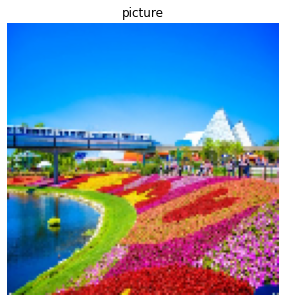

In [ ]:
draw_picture(img, 'picture')

In [ ]:
# Split the image into its three color channels
b, g, r = cv2.split(img)

# Flatten the color channels to 1D arrays
b_flat = b.flatten()
g_flat = g.flatten()
r_flat = r.flatten()

# Create a 2D numpy array with the color channel data
data = np.array([b_flat, g_flat, r_flat]).T

# Create a Pandas DataFrame from the numpy array
df = pd.DataFrame(data, columns=['b', 'g', 'r'])


X = df.copy()
X.head()

,b,g,r
0,253,93,0
1,254,95,0
2,254,97,0
3,255,99,0
4,255,101,0


Kmeans

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [ ]:
k_inertia = []
ks = [2, 5, 10, 20]

for k in ks:
    clf_kmeans = KMeans(n_clusters=k, n_init=5)
    clusters_kmeans = clf_kmeans.fit_predict(X, )
    k_inertia.append(clf_kmeans.inertia_)

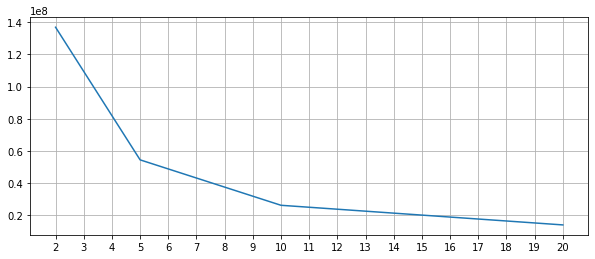

In [ ]:
fig = plt.figure(figsize = (10,4))

plt.xticks(np.arange(0, 21, 1))
plt.plot(ks, k_inertia)

plt.grid()
plt.show()

In [ ]:
model_kmeans = KMeans(n_clusters=5, n_init=10)
model_kmeans.fit(X)
labels = model_kmeans.predict(X)
centroids = model_kmeans.cluster_centers_

In [ ]:
labels

array([2, 2, 2, ..., 0, 3, 1], dtype=int32)

In [ ]:
centroids

array([[221.40935673, 184.17042607, 170.49331662],
       [ 53.39072   , 151.8416    , 169.18528   ],
       [249.55149229, 142.68579862,   8.18432273],
       [103.14456036,  76.2449081 ,  33.23149528],
       [ 64.62672476,  39.7476398 , 180.20152505]])

In [ ]:
new_picture = centroids[labels]
new_picture

array([[249.55149229, 142.68579862,   8.18432273],
       [249.55149229, 142.68579862,   8.18432273],
       [249.55149229, 142.68579862,   8.18432273],
       ...,
       [221.40935673, 184.17042607, 170.49331662],
       [103.14456036,  76.2449081 ,  33.23149528],
       [ 53.39072   , 151.8416    , 169.18528   ]])

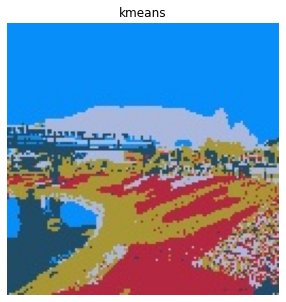

In [ ]:
# Reshape the data array back to the original image dimensions
data_out = new_picture.reshape((img.shape[0], img.shape[1], 3))

# Convert the data array to a uint8 numpy array
data_out = data_out.astype(np.uint8)

# Create the output image from the numpy array
out_img = cv2.cvtColor(data_out, cv2.COLOR_BGR2RGB)
out_img = cv2.cvtColor(out_img, cv2.COLOR_RGB2BGR)

# Write the output image to file
cv2.imwrite('kmeans_pic.jpg', out_img)

draw_picture(cv2.imread('/content/kmeans_pic.jpg'), 'kmeans')

In [ ]:
img1 = cv2.imread('/content/resized_pic.jpg')
img2 = cv2.imread('/content/kmeans_pic.jpg')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

score_1, diff = structural_similarity(img1, img2, full=True)
print("SSIM: {:.2f}".format(score_1))

SSIM: 0.73


DBSCAN

In [ ]:
X = df.copy()

model_dbscan = DBSCAN(eps=8, min_samples=5)
model_dbscan.fit(X)
model_labels = model_dbscan.labels_

In [ ]:
model_labels

array([ 0,  0,  0, ..., 15,  9, -1])

In [ ]:
np.unique(model_labels)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131])

In [ ]:
labels = np.unique(model_labels)
centroids = []
# итерация по меткам кластеров, вычисление медианного значения признаков
for label in labels:
    if label == -1:
        continue
    cluster_points = X[model_labels == label]
    centroid = np.median(cluster_points, axis=0)
    centroids.append(centroid)
    print(f"Центроид кластера {label}: {centroid}")

centroids = np.array(centroids)

Центроид кластера 0: [254. 149.   0.]
Центроид кластера 1: [214. 158.  79.]
Центроид кластера 2: [232.  185.5 109.5]
Центроид кластера 3: [249.  240.  224.5]
Центроид кластера 4: [212. 172. 121.]
Центроид кластера 5: [236. 177.  65.]
Центроид кластера 6: [175. 134.  62.]
Центроид кластера 7: [216. 172.  61.]
Центроид кластера 8: [ 19. 170. 125.]
Центроид кластера 9: [123.  24.   0.]
Центроид кластера 10: [149.  88.   4.]
Центроид кластера 11: [213. 147. 102.]
Центроид кластера 12: [105.  63.  37.]
Центроид кластера 13: [190. 162. 134.]
Центроид кластера 14: [193. 130.  74.]
Центроид кластера 15: [212. 192. 164.]
Центроид кластера 16: [225. 177. 116.]
Центроид кластера 17: [230.  178.5 126.5]
Центроид кластера 18: [173. 124.  91.]
Центроид кластера 19: [175.  86.  24.]
Центроид кластера 20: [171.  63.   9.]
Центроид кластера 21: [193. 142.  90.]
Центроид кластера 22: [205.  163.  104.5]
Центроид кластера 23: [205. 120.  64.]
Центроид кластера 24: [145.  104.5  48.5]
Центроид кластера 25

In [ ]:
centroids

array([[254. , 149. ,   0. ],
       [214. , 158. ,  79. ],
       [232. , 185.5, 109.5],
       [249. , 240. , 224.5],
       [212. , 172. , 121. ],
       [236. , 177. ,  65. ],
       [175. , 134. ,  62. ],
       [216. , 172. ,  61. ],
       [ 19. , 170. , 125. ],
       [123. ,  24. ,   0. ],
       [149. ,  88. ,   4. ],
       [213. , 147. , 102. ],
       [105. ,  63. ,  37. ],
       [190. , 162. , 134. ],
       [193. , 130. ,  74. ],
       [212. , 192. , 164. ],
       [225. , 177. , 116. ],
       [230. , 178.5, 126.5],
       [173. , 124. ,  91. ],
       [175. ,  86. ,  24. ],
       [171. ,  63. ,   9. ],
       [193. , 142. ,  90. ],
       [205. , 163. , 104.5],
       [205. , 120. ,  64. ],
       [145. , 104.5,  48.5],
       [170. , 141. , 137. ],
       [198. , 176. , 176. ],
       [221. , 168.5, 149.5],
       [ 64. , 195. , 159. ],
       [ 61. , 155. , 137.5],
       [ 32.5,  23. ,  15. ],
       [ 56. ,  47. ,  42. ],
       [ 64. ,  59. ,  50. ],
       [ 9

In [ ]:
new_picture = centroids[model_labels]
new_picture

array([[254., 149.,   0.],
       [254., 149.,   0.],
       [254., 149.,   0.],
       ...,
       [212., 192., 164.],
       [123.,  24.,   0.],
       [ 67.,  53., 176.]])

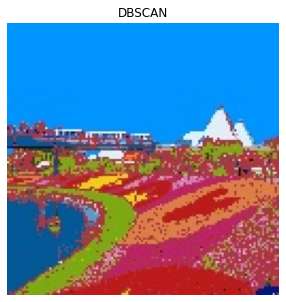

In [ ]:
# Reshape the data array back to the original image dimensions
data_out = new_picture.reshape((img.shape[0], img.shape[1], 3))

# Convert the data array to a uint8 numpy array
data_out = data_out.astype(np.uint8)

# Create the output image from the numpy array
out_img = cv2.cvtColor(data_out, cv2.COLOR_BGR2RGB)
out_img = cv2.cvtColor(out_img, cv2.COLOR_RGB2BGR)

# Write the output image to file
cv2.imwrite('DBSCAN_pic.jpg', out_img)

draw_picture(cv2.imread('/content/DBSCAN_pic.jpg'), 'DBSCAN')

In [ ]:
img1 = cv2.imread('/content/resized_pic.jpg')
img2 = cv2.imread('/content/DBSCAN_pic.jpg')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

score_2, diff = structural_similarity(img1, img2, full=True)
print("SSIM: {:.2f}".format(score_2))

SSIM: 0.61


AgglomerativeClustering

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
X = df.copy()

model_agglo = AgglomerativeClustering(n_clusters=5)
model_agglo.fit(X)
model_labels = model_agglo.labels_

In [ ]:
np.unique(model_labels)

array([0, 1, 2, 3, 4])

In [ ]:
labels = np.unique(model_labels)
centroids = []
# итерация по меткам кластеров, вычисление медианного значения признаков
for label in labels:
    if label == -1:
        continue
    cluster_points = X[model_labels == label]
    centroid = np.median(cluster_points, axis=0)
    centroids.append(centroid)
    print(f"Центроид кластера {label}: {centroid}")

centroids = np.array(centroids)

Центроид кластера 0: [101.  86.  37.]
Центроид кластера 1: [254. 144.   0.]
Центроид кластера 2: [222. 193. 188.]
Центроид кластера 3: [ 47. 154. 180.]
Центроид кластера 4: [ 46.  32. 184.]


In [ ]:
centroids

array([[101.,  86.,  37.],
       [254., 144.,   0.],
       [222., 193., 188.],
       [ 47., 154., 180.],
       [ 46.,  32., 184.]])

In [ ]:
new_picture = centroids[model_labels]
new_picture

array([[254., 144.,   0.],
       [254., 144.,   0.],
       [254., 144.,   0.],
       ...,
       [222., 193., 188.],
       [101.,  86.,  37.],
       [101.,  86.,  37.]])

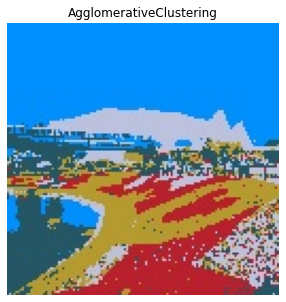

In [ ]:
# Reshape the data array back to the original image dimensions
data_out = new_picture.reshape((img.shape[0], img.shape[1], 3))

# Convert the data array to a uint8 numpy array
data_out = data_out.astype(np.uint8)

# Create the output image from the numpy array
out_img = cv2.cvtColor(data_out, cv2.COLOR_BGR2RGB)
out_img = cv2.cvtColor(out_img, cv2.COLOR_RGB2BGR)

# Write the output image to file
cv2.imwrite('agglo_pic.jpg', out_img)

draw_picture(cv2.imread('/content/agglo_pic.jpg'), 'AgglomerativeClustering')

In [ ]:
img1 = cv2.imread('/content/resized_pic.jpg')
img2 = cv2.imread('/content/agglo_pic.jpg')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

score_3, diff = structural_similarity(img1, img2, full=True)
print("SSIM: {:.2f}".format(score_3))

SSIM: 0.75


Выводы:

In [ ]:
pd.DataFrame([score_1, score_2, score_3], index=['Kmeans', 'DBSCAN', 'AgglomerativeClustering'], columns=['SSIM'])

,SSIM
Kmeans,0.734855
DBSCAN,0.605852
AgglomerativeClustering,0.745193
